In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'depth'})
tmask = tmask.rename({'y' : 'gridY'})
tmask = tmask.rename({'x' : 'gridX'})
area = meshmask.e1t[0] * meshmask.e2t[0]
area = area.rename({'y': 'gridY'})
area = area.rename({'x': 'gridX'})
area

<xarray.DataArray (gridY: 898, gridX: 398)>
array([[185243.16065032, 190803.27747661, 194671.95335081, ...,
        231244.7650926 , 231250.57782804, 231256.38616842],
       [185143.22065913, 190700.12381496, 194576.64831066, ...,
        231218.44692684, 231224.25621104, 231230.06109609],
       [192573.97235167, 194186.67154445, 196368.25566354, ...,
        231178.55957774, 231184.36291238, 231190.16184242],
       ...,
       [234534.93463225, 234471.10689115, 234011.83013385, ...,
        178285.33125841, 177754.66344186, 177255.24489697],
       [236196.92164773, 236103.23266655, 235423.37323571, ...,
        177713.53480049, 177057.4920366 , 176408.64494444],
       [238326.73957072, 238154.91585215, 237066.18933351, ...,
        177165.37586233, 176356.42614012, 175503.8701075 ]])
Dimensions without coordinates: gridY, gridX

In [3]:
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_vel = copy.copy(cm.curl)
cm_vel.set_bad('grey')

In [4]:
data = xr.open_dataset('/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_Outfall_20180101_20190430.nc')
data = data.drop(['time'])
time_values = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10','2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04']
data = data.assign_coords(time = time_values)

In [5]:
total_outfall = (data['outfall'] * area).where(tmask).sum(axis = 2).sum(axis = 2) / area.where(tmask).sum()
total_outfall

<xarray.DataArray (time: 16, depth: 40)>
array([[1.23135525e-07, 1.24392100e-07, 1.27503614e-07, 1.31658084e-07,
        1.32373304e-07, 1.36160417e-07, 1.39706544e-07, 1.43000789e-07,
        1.46164849e-07, 1.49047642e-07, 1.52358425e-07, 1.55167559e-07,
        1.57978639e-07, 1.61137066e-07, 1.64903978e-07, 1.69288414e-07,
        1.75011245e-07, 1.80364653e-07, 1.88154327e-07, 1.99709322e-07,
        2.17270702e-07, 2.49013586e-07, 2.92397992e-07, 3.05906586e-07,
        2.53641470e-07, 1.73824356e-07, 1.02971914e-07, 5.53864736e-08,
        2.46520658e-08, 9.20598584e-09, 3.32381058e-09, 1.05631744e-09,
        2.86388377e-10, 8.23286038e-11, 3.09289096e-11, 9.72688499e-12,
        1.00341279e-12, 2.65192985e-13, 4.89262320e-14, 0.00000000e+00],
       [3.61847679e-07, 3.65539421e-07, 3.67709860e-07, 3.67029000e-07,
        3.58072325e-07, 3.53040952e-07, 3.47939371e-07, 3.43528514e-07,
        3.39363007e-07, 3.36072944e-07, 3.34572908e-07, 3.34343746e-07,
        3.35984629e-07, 3.39217871e-07, 3.44875633e-07, 3.52644885e-07,
        3.62918981e-07, 3.74957187e-07, 3.91309638e-07, 4.14625727e-07,
        4.50030050e-07, 5.05494822e-07, 5.76698339e-07, 6.27722152e-07,
        6.06291695e-07, 5.30317068e-07, 4.15543367e-07, 2.81795140e-07,
        1.45988459e-07, 5.96126535e-08, 2.25995782e-08, 7.99298941e-09,
        2.74913686e-09, 9.38351955e-10, 3.97912495e-10, 1.52657776e-10,
        3.68109674e-11, 1.18210620e-11, 2.33390918e-12, 0.00000000e+00],
...
       [2.67402851e-06, 2.68629537e-06, 2.69448992e-06, 2.70287826e-06,
        2.66880917e-06, 2.66726766e-06, 2.66219129e-06, 2.66054715e-06,
        2.65518608e-06, 2.65109579e-06, 2.65009075e-06, 2.64836865e-06,
        2.64589561e-06, 2.64252248e-06, 2.64216078e-06, 2.64293916e-06,
        2.64613114e-06, 2.64855172e-06, 2.65434021e-06, 2.66338586e-06,
        2.67496395e-06, 2.70028991e-06, 2.73175583e-06, 2.66996277e-06,
        2.41080032e-06, 2.02066114e-06, 1.64133084e-06, 1.32877254e-06,
        1.05010704e-06, 8.06521475e-07, 5.91468652e-07, 4.26068341e-07,
        3.08497724e-07, 2.29834804e-07, 1.77057473e-07, 1.30539757e-07,
        8.69568165e-08, 6.05554574e-08, 3.80848430e-08, 0.00000000e+00],
       [2.81961923e-06, 2.84972458e-06, 2.88985849e-06, 2.91951065e-06,
        2.89828969e-06, 2.90029261e-06, 2.89257515e-06, 2.88425800e-06,
        2.87001234e-06, 2.85647931e-06, 2.84709508e-06, 2.83924148e-06,
        2.83266642e-06, 2.82632950e-06, 2.82361887e-06, 2.82242679e-06,
        2.82366995e-06, 2.82431566e-06, 2.82617100e-06, 2.82790742e-06,
        2.82620919e-06, 2.82560516e-06, 2.82379625e-06, 2.75070675e-06,
        2.52735054e-06, 2.17391110e-06, 1.80205850e-06, 1.46989227e-06,
        1.15255104e-06, 8.74985486e-07, 6.41410535e-07, 4.61043465e-07,
        3.36104620e-07, 2.50254150e-07, 1.91236421e-07, 1.38922936e-07,
        9.07164405e-08, 6.23141234e-08, 3.85323957e-08, 0.00000000e+00]])
Coordinates:
  * depth    (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
  * time     (time) <U7 '2018-01' '2018-02' '2018-03' ... '2019-03' '2019-04'

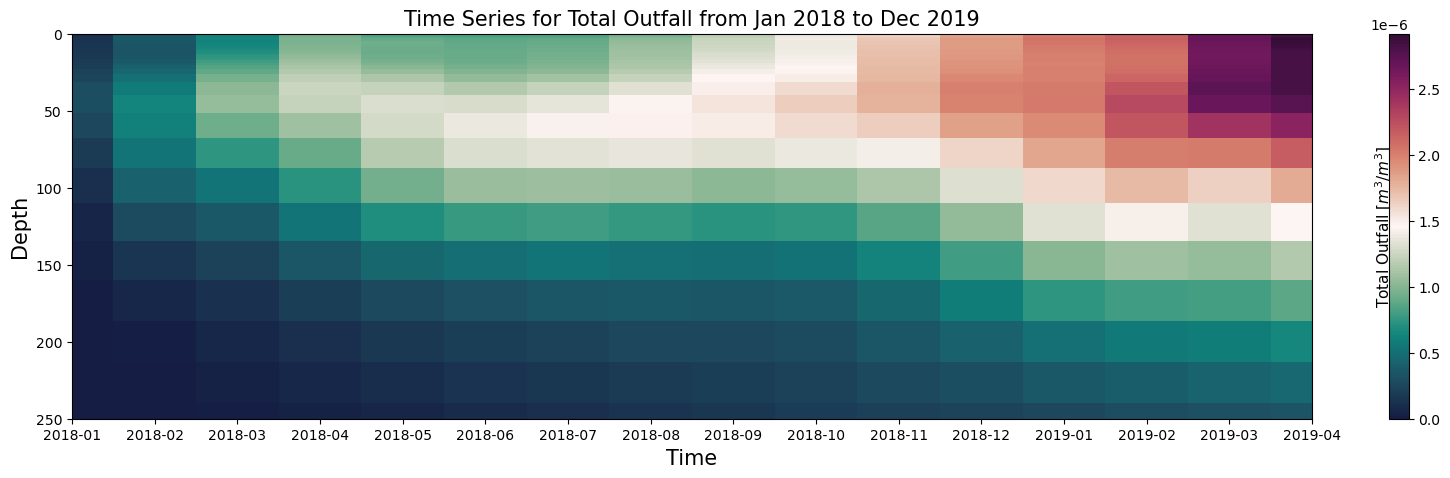

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(20, 5))
total_outfall.plot(ax = axs, y = "depth", yincrease = False, cmap = cm_vel)
axs.set_ylim(250, 0)
axs.set_title(f'Time Series for Total Outfall from Jan 2018 to Dec 2019', fontsize = 15)
axs.set_xlabel('Time', fontsize = 15)
axs.set_ylabel('Depth', fontsize = 15)

label_text = 'Total Outfall [$m^3/m^3$]'  # Replace with the desired label text
label_x = 1.05  # Adjust the position of the label on the x-axis as needed
label_y = 0.5  # Adjust the position of the label on the y-axis as needed
axs.text(label_x, label_y, label_text, transform=axs.transAxes, rotation=90, va='center', fontsize = 11)
fig.savefig('outfallTimeSeries.png', dpi=300)
